Importamos los paquetes que vamos a usar

# Introducción
---
Vamos a trabajar con una base datos la cual recoge información a cerca de diversas caracteríticas de diversos estudiantes, ya sea trabajo de los progenitores, nacionalidad, PIB, curso... Todas estas quedan indicadas en el siguiente apartado, análisis de datos. El propósito de este trabajo es obtener un algoritmo el cual clasifique los datos proporcionados de cada estudiante, prediciendo su éxito académico.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Ánalisis de datos
---
En la base de datos tenemos los siguientes cambios de datos a valor numérico:

**Estado civil:**

    1 – Soltero/a

    2 – Casado/a

    3 – Viudo/a

    4 – Divorciado/a

    5 – Unión de hecho

    6 – Separado/a legalmente

**Modo de aplicación:**

    1 - 1ª fase - contingente general

    2 - Ordenanza N.º 612/93

    5 - 1ª fase - contingente especial (Isla de Azores)

    7 - Titulares de otros cursos superiores

    10 - Ordenanza N.º 854-B/99

    15 - Estudiante internacional (licenciatura)

    16 - 1ª fase - contingente especial (Isla de Madeira)

    17 - 2ª fase - contingente general

    18 - 3ª fase - contingente general

    26 - Ordenanza N.º 533-A/99, apartado b2) (Plan Diferente)

    27 - Ordenanza N.º 533-A/99, apartado b3 (Otra Institución)

    39 - Mayores de 23 años

    42 - Transferencia

    43 - Cambio de carrera

    44 - Titulares de diploma de especialización tecnológica

    51 - Cambio de institución/carrera

    53 - Titulares de diploma de ciclo corto

    57 - Cambio de institución/carrera (Internacional)

**Orden de aplicación:**

    Orden de solicitud (entre 0 - primera opción; y 9 - última opción)

**Curso:**

    33 - Tecnologías de Producción de Biocombustibles

    171 - Diseño de Animación y Multimedia

    8014 - Servicio Social (atención nocturna)

    9003 - Agronomía

    9070 - Diseño de Comunicación

    9085 - Enfermería Veterinaria

    9119 - Ingeniería Informática

    9130 - Equinicultura

    9147 - Gestión

    9238 - Servicio Social

    9254 - Turismo

    9500 - Enfermería

    9556 - Higiene Oral

    9670 - Gestión de Publicidad y Marketing

    9773 - Periodismo y Comunicación

    9853 - Educación Básica

    9991 - Gestión (atención nocturna)

**Asistencia diurna/nocturna:**

    1 – Diurna

    0 – Nocturna

**Titulación previa:**

    1 - Educación secundaria

    2 - Educación superior - licenciatura

    3 - Educación superior - grado

    4 - Educación superior - maestría

    5 - Educación superior - doctorado

    6 - Asistencia a la educación superior

    9 - 12º año de escolaridad - no completado

    10 - 11º año de escolaridad - no completado

    12 - Otro - 11º año de escolaridad

    14 - 10º año de escolaridad

    15 - 10º año de escolaridad - no completado

    19 - Educación básica 3er ciclo (9º/10º/11º año) o equivalente

    38 - Educación básica 2º ciclo (6º/7º/8º año) o equivalente

    39 - Curso de especialización tecnológica

    40 - Educación superior - grado (1º ciclo)

    42 - Curso técnico superior profesional

    43 - Educación superior - maestría (2º ciclo)

**Titulación previa (grado):**

    Calificación de la titulación previa (entre 0 y 200)

**Nacionalidad:**

    1 - Portugués

    2 - Alemán

    6 - Español

    11 - Italiano

    13 - Neerlandés

    14 - Inglés

    17 - Lituano

    21 - Angoleño

    22 - Caboverdiano

    24 - Guineano

    25 - Mozambiqueño

    26 - Santotomense

    32 - Turco

    41 - Brasileño

    62 - Rumano

    100 - Moldavo (República de Moldavia)

    101 - Mexicano

    103 - Ucraniano

    105 - Ruso

    108 - Cubano

    109 - Colombiano

**Titulación de la madre:**

    1 - Educación Secundaria - 12º Año de Escolaridad o Equivalente

    2 - Educación Superior - Licenciatura

    3 - Educación Superior - Grado

    4 - Educación Superior - Maestría

    5 - Educación Superior - Doctorado

    6 - Asistencia a la Educación Superior

    9 - 12º Año de Escolaridad - No Completado

    10 - 11º Año de Escolaridad - No Completado

    11 - 7º Año (Antiguo)

    12 - Otro - 11º Año de Escolaridad

    14 - 10º Año de Escolaridad

    18 - Curso de Comercio General

    19 - Educación Básica 3er Ciclo (9º/10º/11º Año) o Equivalente

    22 - Curso Técnico-Profesional

    26 - 7º Año de Escolaridad

    27 - 2º Ciclo del Curso General de Educación Secundaria

    29 - 9º Año de Escolaridad - No Completado

    30 - 8º Año de Escolaridad

    34 - Desconocido

    35 - No sabe leer ni escribir

    36 - Puede leer sin haber completado el 4º Año de Escolaridad

    37 - Educación Básica 1er Ciclo (4º/5º Año) o Equivalente

    38 - Educación Básica 2º Ciclo (6º/7º/8º Año) o Equivalente

    39 - Curso de Especialización Tecnológica

    40 - Educación Superior - Grado (1º Ciclo)

    41 - Curso de Estudios Superiores Especializados

    42 - Curso Técnico Superior Profesional

    43 - Educación Superior - Maestría (2º Ciclo)

    44 - Educación Superior - Doctorado (3º Ciclo)

**Titulación del padre:**

    1 - Educación Secundaria - 12º Año de Escolaridad o Equivalente

    2 - Educación Superior - Licenciatura

    3 - Educación Superior - Grado

    4 - Educación Superior - Maestría

    5 - Educación Superior - Doctorado

    6 - Asistencia a la Educación Superior

    9 - 12º Año de Escolaridad - No Completado

    10 - 11º Año de Escolaridad - No Completado

    11 - 7º Año (Antiguo)

    12 - Otro - 11º Año de Escolaridad

    13 - 2º Año del Curso Complementario de Educación Secundaria

    14 - 10º Año de Escolaridad

    18 - Curso de Comercio General

    19 - Educación Básica 3er Ciclo (9º/10º/11º Año) o Equivalente

    20 - Curso Complementario de Educación Secundaria

    22 - Curso Técnico-Profesional

    25 - Curso Complementario de Educación Secundaria - no concluido

    26 - 7º Año de Escolaridad

    27 - 2º Ciclo del Curso General de Educación Secundaria

    29 - 9º Año de Escolaridad - No Completado

    30 - 8º Año de Escolaridad

    31 - Curso General de Administración y Comercio

    33 - Contabilidad y Administración Suplementaria

    34 - Desconocido

    35 - No sabe leer ni escribir

    36 - Puede leer sin haber completado el 4º Año de Escolaridad

    37 - Educación Básica 1er Ciclo (4º/5º Año) o Equivalente

    38 - Educación Básica 2º Ciclo (6º/7º/8º Año) o Equivalente

    39 - Curso de Especialización Tecnológica

    40 - Educación Superior - Grado (1º Ciclo)

    41 - Curso de Estudios Superiores Especializados

    42 - Curso Técnico Superior Profesional

    43 - Educación Superior - Maestría (2º Ciclo)

    44 - Educación Superior - Doctorado (3º Ciclo)

**Ocupación de la madre:**

    0 - Estudiante

    1 - Representantes del Poder Legislativo y de los Órganos Ejecutivos, Directores, Gerentes y Directores Ejecutivos

    2 - Especialistas en Actividades Intelectuales y Científicas

    3 - Técnicos y Profesionales de Nivel Intermedio

    4 - Personal Administrativo

    5 - Trabajadores de Servicios Personales, Seguridad y Protección, y Vendedores

    6 - Agricultores y Trabajadores Calificados en Agricultura, Pesca y Silvicultura

    7 - Trabajadores Calificados en la Industria, Construcción y Artesanía

    8 - Operadores de Instalación y Maquinaria y Trabajadores de Ensamblaje

    9 - Trabajadores No Calificados

    10 - Profesiones de las Fuerzas Armadas

    90 - Otra Situación

    99 - (en blanco)

    122 - Profesionales de la Salud

    123 - Profesores

    125 - Especialistas en Tecnologías de la Información y la Comunicación (TIC)

    131 - Técnicos y Profesionales de Ciencias e Ingenierías de Nivel Intermedio

    132 - Técnicos y Profesionales de Nivel Intermedio en Salud

    134 - Técnicos de Nivel Intermedio de Servicios Legales, Sociales, Deportivos, Culturales y Similares

    141 - Trabajadores de Oficina, Secretarios en General y Operadores de Procesamiento de Datos

    143 - Operadores de Datos, Contabilidad, Estadística, Servicios Financieros y Registros

    144 - Otro Personal de Apoyo Administrativo

    151 - Trabajadores de Servicios Personales

    152 - Vendedores

    153 - Trabajadores de Cuidado Personal y similares

    171 - Trabajadores Calificados en Construcción y similares, excepto Electricistas

    173 - Trabajadores Calificados en Impresión, Fabricación de Instrumentos de Precisión, Joyeros, Artesanos y similares

    175 - Trabajadores en Procesamiento de Alimentos, Trabajo en Madera, Confección y otras Industrias y Artesanías

    191 - Trabajadores de Limpieza

    192 - Trabajadores No Calificados en Agricultura, Producción Animal, Pesca y Silvicultura

    193 - Trabajadores No Calificados en Industria Extractiva, Construcción, Manufactura y Transporte

    194 - Asistentes de Preparación de Comidas

**Ocupación del padre:**

    0 - Estudiante

    1 - Representantes del Poder Legislativo y de los Órganos Ejecutivos, Directores, Gerentes y Directores Ejecutivos

    2 - Especialistas en Actividades Intelectuales y Científicas

    3 - Técnicos y Profesionales de Nivel Intermedio

    4 - Personal Administrativo

    5 - Trabajadores de Servicios Personales, Seguridad y Protección, y Vendedores

    6 - Agricultores y Trabajadores Calificados en Agricultura, Pesca y Silvicultura

    7 - Trabajadores Calificados en la Industria, Construcción y Artesanía

    8 - Operadores de Instalación y Maquinaria y Trabajadores de Ensamblaje

    9 - Trabajadores No Calificados

    10 - Profesiones de las Fuerzas Armadas

    90 - Otra Situación

    99 - (en blanco)

    101 - Oficiales de las Fuerzas Armadas

    102 - Sargentos de las Fuerzas Armadas

    103 - Otro Personal de las Fuerzas Armadas

    112 - Directores de Servicios Administrativos y Comerciales

    114 - Directores de Servicios de Hotelería, Restauración, Comercio y Otros

    121 - Especialistas en Ciencias Físicas, Matemáticas, Ingeniería y Técnicas Relacionadas

    122 - Profesionales de la Salud

    123 - Profesores

    124 - Especialistas en Finanzas, Contabilidad, Organización Administrativa, Relaciones Públicas y Comerciales

    131 - Técnicos y Profesionales de Ciencias e Ingenierías de Nivel Intermedio

    132 - Técnicos y Profesionales de Nivel Intermedio en Salud

    134 - Técnicos de Nivel Intermedio de Servicios Legales, Sociales, Deportivos, Culturales y Similares

    135 - Técnicos en Tecnologías de la Información y la Comunicación

    141 - Trabajadores de Oficina, Secretarios en General y Operadores de Procesamiento de Datos

    143 - Operadores de Datos, Contabilidad, Estadística, Servicios Financieros y Registros

    144 - Otro Personal de Apoyo Administrativo

    151 - Trabajadores de Servicios Personales

    152 - Vendedores

    153 - Trabajadores de Cuidado Personal y similares

    154 - Personal de Servicios de Protección y Seguridad

    161 - Agricultores Orientados al Mercado y Trabajadores Calificados en Producción Agrícola y Animal

    163 - Agricultores, Ganaderos, Pescadores, Cazadores y Recolectores, de Subsistencia

    171 - Trabajadores Calificados en Construcción y similares, excepto Electricistas

    172 - Trabajadores Calificados en Metalurgia, Mecanizado y similares

    174 - Trabajadores Calificados en Electricidad y Electrónica

    175 - Trabajadores en Procesamiento de Alimentos, Trabajo en Madera, Confección y otras Industrias y Artesanías

    181 - Operadores de Plantas y Máquinas Fijas

    182 - Trabajadores de Ensamblaje

    183 - Conductores de Vehículos y Operadores de Equipos Móviles

    192 - Trabajadores No Calificados en Agricultura, Producción Animal, Pesca y Silvicultura

    193 - Trabajadores No Calificados en Industria Extractiva, Construcción, Manufactura y Transporte

    194 - Asistentes de Preparación de Comidas

    195 - Vendedores Ambulantes (excepto alimentos) y Proveedores de Servicios en la Calle

**Nota de admisión:**

    Calificación de admisión (entre 0 y 200)

**Desplazado:**

    1 – Sí

    0 – No

**Necesidades educativas especiales:**

    1 – Sí

    0 – No

**Deudor/a:**

    1 – Sí

    0 – No

**Cuotas de matrícula actualizadas:**

    1 – Sí

    0 – No

**Género:**

    1 – Hombre

    0 – Mujer

**Beneficiario de beca:**

    1 – Sí

    0 – No

**Edad al momento de la matrícula:**

    Edad del estudiante al momento de la matrícula

**Internacional:**

    1 – Sí

    0 – No

**Unidades curriculares 1er semestre (acreditadas):**

    Número de unidades curriculares acreditadas en el 1er semestre

**Unidades curriculares 1er semestre (matriculadas):**

    Número de unidades curriculares matriculadas en el 1er semestre

**Unidades curriculares 1er semestre (evaluaciones):**

    Número de unidades curriculares evaluaciones en el 1er semestre

**Unidades curriculares 1er semestre (aprobadas):**

    Número de unidades curriculares aprobadas en el 1er semestre

**Unidades curriculares 1er semestre (calificación):**

    Promedio de calificaciones en el 1er semestre (entre 0 y 20)

**Unidades curriculares 1er semestre (sin evaluaciones):**

    Número de unidades curriculares sin evaluaciones en el 1er semestre

**Unidades curriculares 2er semestre (acreditadas):**

    Número de unidades curriculares acreditadas en el 2er semestre

**Unidades curriculares 2er semestre (matriculadas):**

    Número de unidades curriculares matriculadas en el 2er semestre

**Unidades curriculares 2er semestre (evaluaciones):**

    Número de unidades curriculares evaluaciones en el 2er semestre

**Unidades curriculares 2er semestre (aprobadas):**

    Número de unidades curriculares aprobadas en el 2er semestre

**Unidades curriculares 2er semestre (calificación):**

    Promedio de calificaciones en el 2er semestre (entre 0 y 20)

**Unidades curriculares 2er semestre (sin evaluaciones):**

    Número de unidades curriculares sin evaluaciones en el 2er semestre

**Tasa de desempleo:**

    Tasa de desempleo (%)

**Tasa de inflación:**

    Tasa de inflación (%)

**PIB:**

    PIB

**Objetivo:**

    El problema se formula como una tarea de clasificación de tres categorías (deserción, matriculado y graduado) al final de la duración normal del curso.

Ahora vamos a leer el archivo .csv con pandas:

In [2]:
df=pd.read_csv('data.csv',delimiter=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
print(df.head())
print(df.info())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

Observamos los tipos de datos y nulos:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Vemos estadísticas de las distintas características:

In [5]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Asignamos valores a graduarse, matricularse y a abandonar:

In [6]:
target_mapping={
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
}

df['Target'] = df['Target'].replace(target_mapping)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


Mostramos los histogramas: 

c:\Anaconda\envs\mi_entorno\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


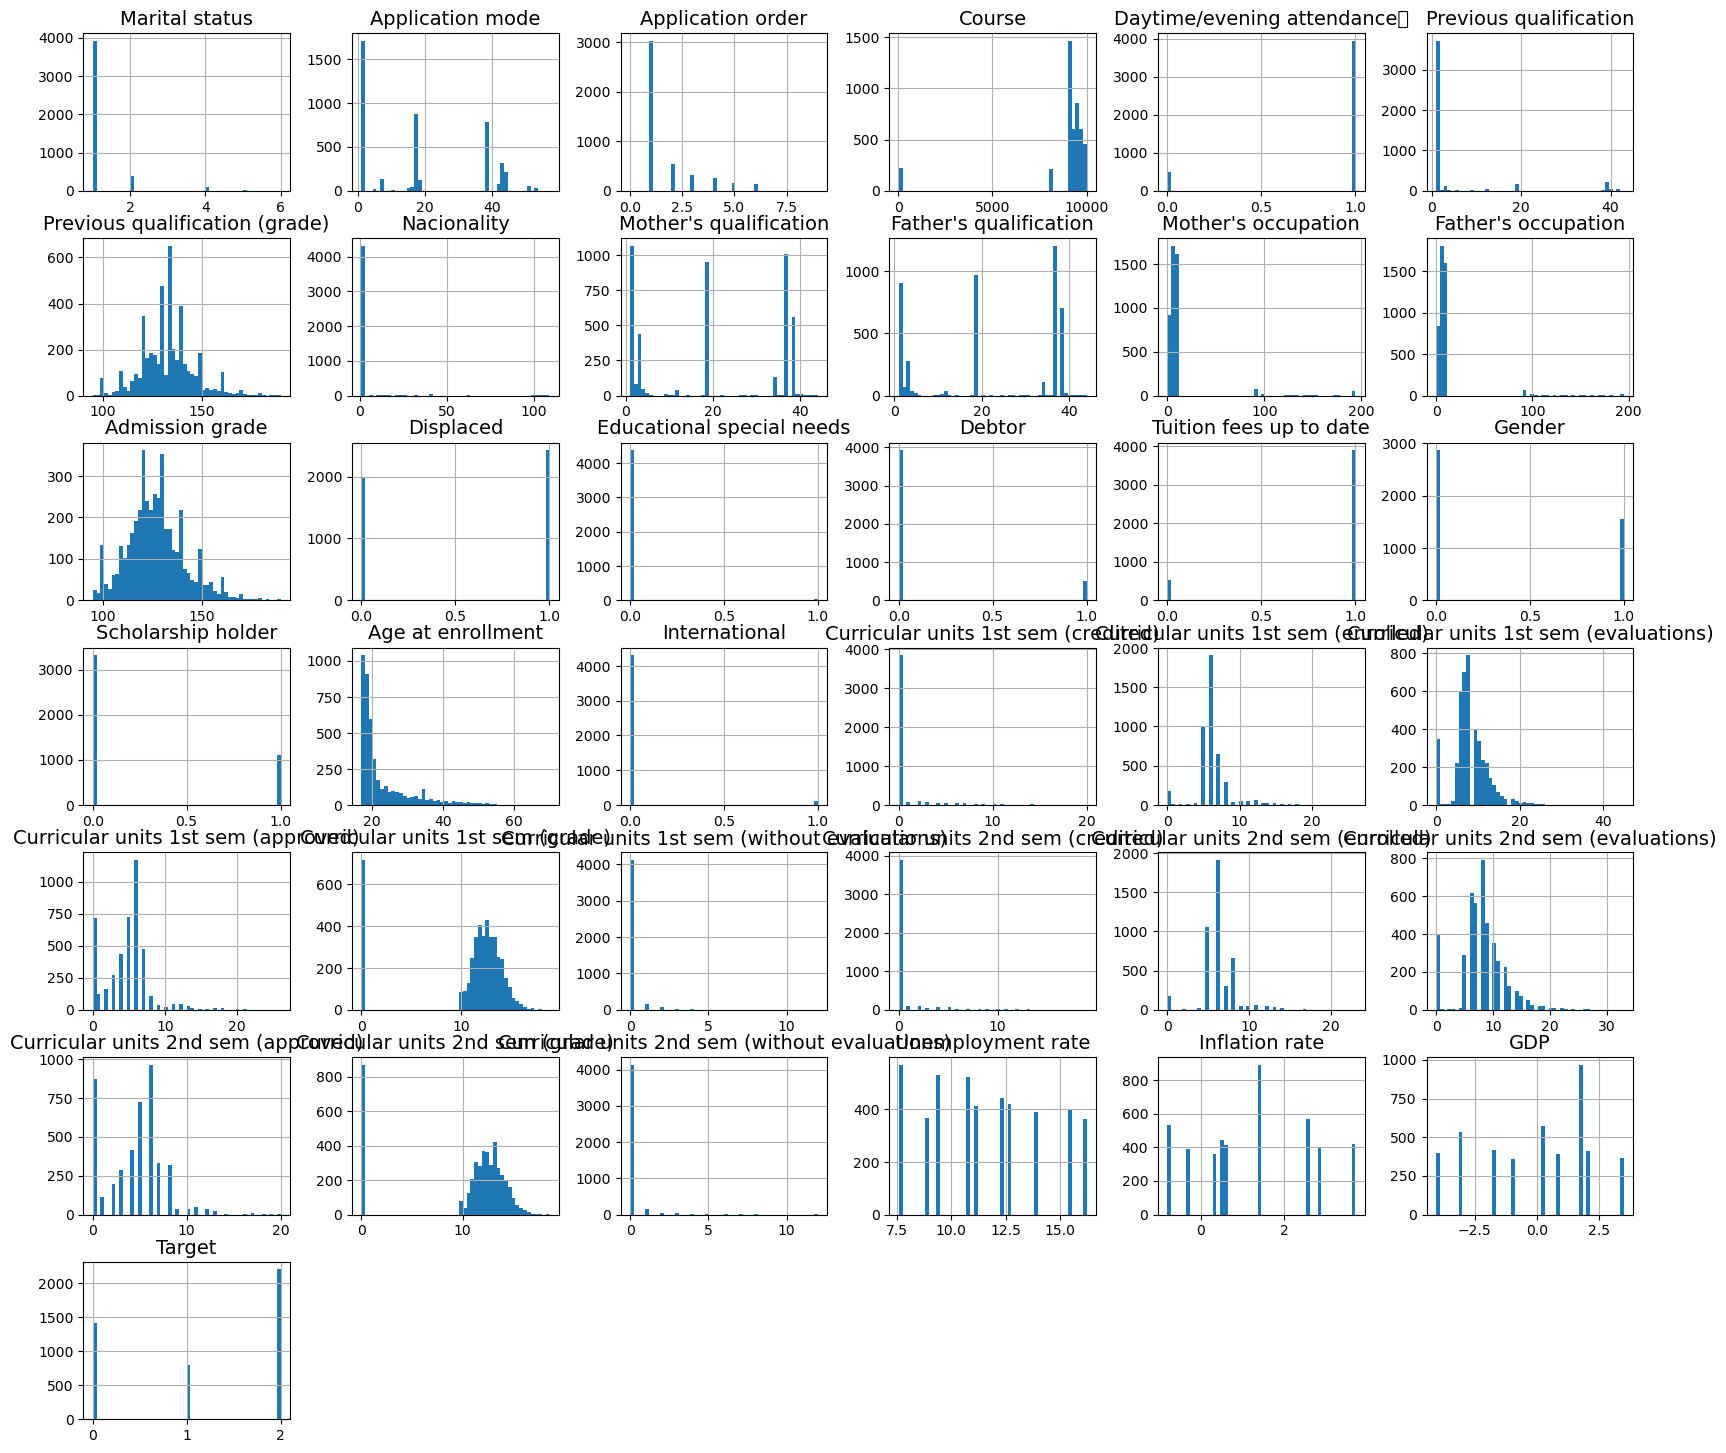

In [7]:

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(20, 18))
plt.show()

Vemos que los datos no están balanceados con respecto al objetivo (a la hora de obtener los datos de entrenamiento lo tendremos en cuenta).

Calculamos la matriz de correlación:

In [8]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,...,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003,-0.089804
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,...,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743,-0.221747
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,...,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,0.089791
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,...,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265,0.034219
Daytime/evening attendance\t,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,...,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929,0.075107
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,...,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069,-0.056039
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,...,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620,0.103764
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,...,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478,-0.014801
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,...,0.042771,0.035150,0.021033,-0.014858,-0.031175,0.021305,-0.114351,0.059441,-0.083657,-0.043178
Father's qualification,0.130353,0.083276,-0.050288,0.050724,-0.139894,-0.006614,-0.035234,-0.085282,0.535140,1.000000,...,0.042666,0.024380,0.009514,0.005285,-0.008083,-0.007430,-0.077905,0.057633,-0.071610,-0.001393


Vemos la correlación de los datos con respecto a la columna objetivo:

corr_matrix["Target"].sort_values(ascending=False)

## Tratamiento de datos
---
En este apartado ajustamos los datos para poder usarlos en los siguientes algoritmos.

Normalizamos los datos:

In [9]:
from sklearn.preprocessing import StandardScaler
df1=df.drop(columns=['Target'])
columnas=df1.columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[columnas]=scaler.fit_transform(df[columnas])
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0.0,0.285714,0.555556,0.013858,1.0,0.0,0.284211,0.000000,0.418605,0.255814,...,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0
1,0.0,0.250000,0.111111,0.925989,1.0,0.0,0.684211,0.000000,0.000000,0.046512,...,0.0,0.260870,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687,2
2,0.0,0.000000,0.555556,0.907512,1.0,0.0,0.284211,0.000000,0.837209,0.837209,...,0.0,0.260870,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0
3,0.0,0.285714,0.222222,0.978108,1.0,0.0,0.284211,0.000000,0.860465,0.837209,...,0.0,0.260870,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174,2
4,0.2,0.678571,0.111111,0.801466,0.0,0.0,0.052632,0.000000,0.837209,0.860465,...,0.0,0.260870,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.0,0.000000,0.666667,0.978108,1.0,0.0,0.315789,0.000000,0.000000,0.000000,...,0.0,0.260870,0.242424,0.25,0.682051,0.0,0.918605,0.800000,0.000000,2
4420,0.0,0.000000,0.222222,0.978108,1.0,0.0,0.263158,0.962963,0.000000,0.000000,...,0.0,0.260870,0.181818,0.10,0.592308,0.0,0.406977,0.311111,0.803170,0
4421,0.0,0.000000,0.111111,0.950693,1.0,0.0,0.621053,0.000000,0.837209,0.837209,...,0.0,0.347826,0.272727,0.05,0.726923,0.0,0.732558,0.111111,0.640687,0
4422,0.0,0.000000,0.111111,0.915244,1.0,0.0,0.894737,0.000000,0.837209,0.837209,...,0.0,0.217391,0.181818,0.25,0.646154,0.0,0.209302,0.000000,0.124174,2


Dividimos los datos en entrenamiento y prueba pero manteniendo el porcentaje de datos de cada caso objetivo por estar desbalanceados como vemos a continuación:


In [10]:
df['Target'].value_counts()/len(df)

Target
2    0.499322
0    0.321203
1    0.179476
Name: count, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

strat_train, strat_test = train_test_split(
    df, test_size=0.3, stratify=df["Target"], random_state=100)

In [12]:
strat_train['Target'].value_counts()/len(strat_train)

Target
2    0.499354
0    0.321059
1    0.179587
Name: count, dtype: float64

Seleccionamos cuales serán los inputs y cual será el output:

In [13]:
X_train = strat_train.drop(columns=['Target'])
Y_train = strat_train['Target']

X_test = strat_test.drop(columns=['Target'])
Y_test = strat_test['Target']


X_train.shape, Y_train.shape, 

## Modelos
---
Vamos a realizar diferentes modelos para clasificar los datos. 

### Red neuronal
---
Creamos la red neuronal y la entrenamos:

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

In [15]:
from tensorflow.keras.utils import to_categorical

Y_train_one_hot = to_categorical(Y_train, num_classes=3)

In [16]:

# Crear el modelo secuencial
model = keras.Sequential([
    layers.Dense(256, input_shape=(X_train.shape[1],)),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(128),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(64),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(32),
    layers.Activation('swish'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(16),
    layers.Activation('swish'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(3, activation='softmax')
])

# Compilación del modelo
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Imprimir resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               9472      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                        

In [17]:
historial = model.fit(X_train,Y_train_one_hot, epochs=80, batch_size=32, validation_split=0.2)

Epoch 1/80
78/78 [==============================] - 5s 13ms/step - loss: 1.5851 - accuracy: 0.3683 - val_loss: 1.0184 - val_accuracy: 0.5355
Epoch 2/80
78/78 [==============================] - 0s 6ms/step - loss: 1.3074 - accuracy: 0.4309 - val_loss: 0.9919 - val_accuracy: 0.5355
Epoch 3/80
78/78 [==============================] - 0s 5ms/step - loss: 1.1736 - accuracy: 0.4725 - val_loss: 0.9599 - val_accuracy: 0.5581
Epoch 4/80
78/78 [==============================] - 0s 6ms/step - loss: 1.0447 - accuracy: 0.5258 - val_loss: 0.8888 - val_accuracy: 0.6226
Epoch 5/80
78/78 [==============================] - 0s 5ms/step - loss: 0.9640 - accuracy: 0.5703 - val_loss: 0.8169 - val_accuracy: 0.6839
Epoch 6/80
78/78 [==============================] - 0s 5ms/step - loss: 0.9485 - accuracy: 0.5868 - val_loss: 0.7488 - val_accuracy: 0.7177
Epoch 7/80
78/78 [==============================] - 0s 6ms/step - loss: 0.9061 - accuracy: 0.6325 - val_loss: 0.7101 - val_accuracy: 0.7355
Epoch 8/80
78/78 [=

Graficamos el loss y el val_loss para ver si la red neuronal está aprendiendo y para ver si existe overfitting:

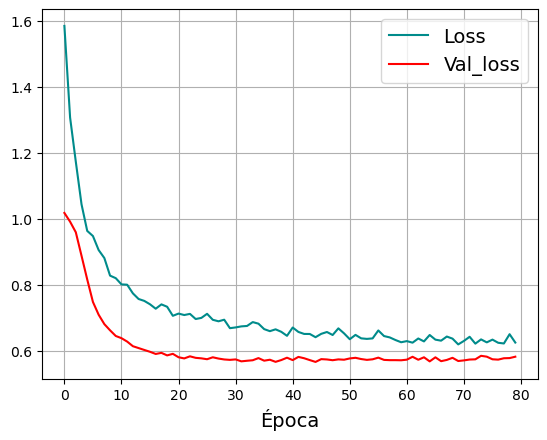

In [18]:
plt.figure(1)
plt.xlabel('Época')
plt.plot(historial.history['loss'],'darkcyan',label='Loss')
plt.plot(historial.history['val_loss'],'r',label='Val_loss')
plt.grid()
plt.legend()

In [19]:
resultado=model.predict(X_test)
Y_test_one_hot = to_categorical(Y_test, num_classes=3)

42/42 [==============================] - 1s 3ms/step


In [20]:
for i in range(resultado.shape[0]):
    x=np.argmax(resultado[i])
    for j in range(resultado.shape[1]):
        if j==x:
            resultado[i,j]=1
        else:
            resultado[i,j]=0


Evaluamos la red neuronal:

In [21]:
res=[]
for i in range(resultado.shape[0]):
    for j in range(resultado.shape[1]):
        if resultado[i,j]==1:
            res.append(j)

Representación gráfica de los puntos del Y_test y de los puntos que nos da nuestro modelo de la red neuronal después de haber sido entrenado:

Esta representación gráfica consiste en observar si los puntos correspondientes a los datos de test coinciden con los que nos da el modelo, a pesar de que, como veremos posteriormente, es mucho más efectivo verlo mediante una matriz de confusión.

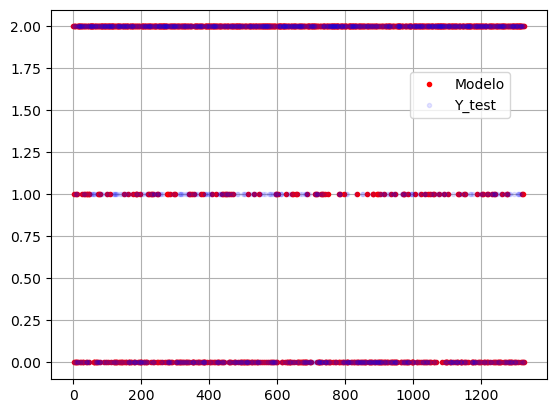

In [22]:
x_fun=np.linspace(0,len(X_test),len(X_test))
plt.figure(2)
plt.plot(x_fun,res,'r.',alpha=1, label='Modelo')
plt.plot(x_fun,Y_test,'b.',alpha=0.1,label='Y_test')
plt.legend(loc='upper right',bbox_to_anchor=(0.94, 0.85),fontsize=10)
plt.grid()


Creamos la matriz de confusión relativa a este modelo

In [23]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, res)
print(conf_matrix)
value=sum(np.diag(conf_matrix))/sum(sum(conf_matrix))*100
print(f"Porcentaje de acierto: {value:.2f}%")

[[306  42  79]
 [ 45  62 131]
 [ 14  10 639]]
Porcentaje de acierto: 75.83%


       Precision    Recall  F1 Score
0       0.838356  0.716628  0.772727
1       0.543860  0.260504  0.352273
2       0.752650  0.963801  0.845238
Media   0.711622  0.646978  0.656746


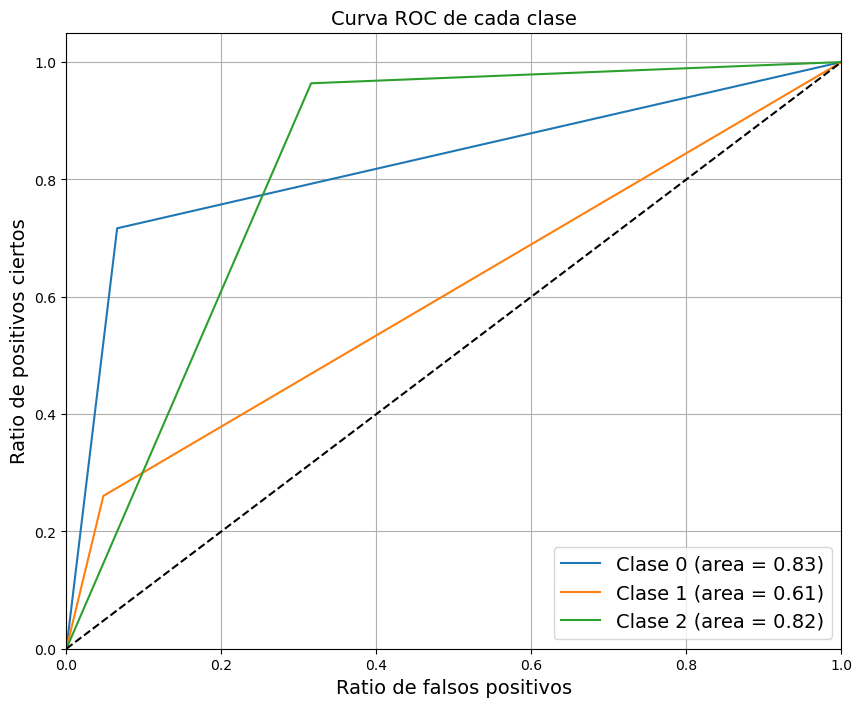

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


resultado_binario = (resultado == resultado.max(axis=1, keepdims=1)).astype(int)
res = [np.argmax(row) for row in resultado_binario]

precision = precision_score(Y_test, res, average=None)
recall = recall_score(Y_test, res, average=None)
f1 = f1_score(Y_test, res, average=None)

#mostramos las tres métricas: precisión recall y f1 score
metrics_df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1 Score': f1}, index=np.unique(Y_test))
metrics_mean = metrics_df.mean().rename('Media')
metrics_df = pd.concat([metrics_df, metrics_mean.to_frame().T])
print(metrics_df)

# binario para ROC/AUC
n_clases = len(np.unique(Y_test))
Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
res_bin = label_binarize(res, classes=np.unique(Y_test))

# Cálculo de la curva ROC y su área en cada claes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_clases):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], res_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Dibujamos la curva Roc de cada clase
plt.figure(figsize=(10, 8))
for i in range(n_clases):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de falsos positivos')
plt.ylabel('Ratio de positivos ciertos')
plt.title('Curva ROC de cada clase')
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Regresión logística
---
Ahora volvemos a crear un algoritmo pero basándonos en una regresión logística:

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_regresion=LogisticRegression()
model_regresion.fit(X_train,Y_train)

Y_pred_regresion=model_regresion.predict(X_test)

c:\Anaconda\envs\mi_entorno\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Calculamos la matriz de confusión:

In [26]:
conf_matrix_regresion = confusion_matrix(Y_test, Y_pred_regresion)
print(conf_matrix_regresion)
value=sum(np.diag(conf_matrix_regresion))/sum(sum(conf_matrix_regresion))*100
print(f"Porcentaje de acierto: {value:.2f}%")

[[310  44  73]
 [ 52  60 126]
 [ 15  14 634]]
Porcentaje de acierto: 75.60%


Mostramos la evaluación del modelo

In [27]:
print(classification_report(Y_test, Y_pred_regresion))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       427
           1       0.51      0.25      0.34       238
           2       0.76      0.96      0.85       663

    accuracy                           0.76      1328
   macro avg       0.70      0.64      0.65      1328
weighted avg       0.74      0.76      0.73      1328



### Decision Tree
---
Creamos un algoritmo de árbol de decisión

In [28]:
from sklearn.tree import DecisionTreeClassifier

model_arbol=DecisionTreeClassifier(random_state=112)
model_arbol.fit(X_train,Y_train)

Y_pred_arbol=model_arbol.predict(X_test)

Matriz de confusión:

In [29]:
conf_matrix_arbol = confusion_matrix(Y_test, Y_pred_arbol)
print(conf_matrix_arbol)
value=sum(np.diag(conf_matrix_arbol))/sum(sum(conf_matrix_arbol))*100
print(f"Porcentaje de acierto: {value:.2f}%")

[[283  83  61]
 [ 53  96  89]
 [ 65  81 517]]
Porcentaje de acierto: 67.47%


Evaluación del modelo:

In [30]:
print(classification_report(Y_test, Y_pred_arbol))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68       427
           1       0.37      0.40      0.39       238
           2       0.78      0.78      0.78       663

    accuracy                           0.67      1328
   macro avg       0.62      0.62      0.62      1328
weighted avg       0.68      0.67      0.68      1328



### Uso de AutoML para buscar el mejor modelo
---
En este apartado vamos a emplear AutoML para tratar de buscar el modelo más preciso:

In [31]:
import h2o
from h2o.automl import H2OAutoML

In [32]:
#Seleccionamos todas las columnas menos la última (que es el objetivo Target)
#cols = df.columns[0:-1]

In [33]:
cols = list(df.columns[0:-1])

In [34]:
cols

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance\t',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation r

(La siguiente celda normalmente la primera vez que la ejecutamos da error pero a la segunda vez ya nos va)

In [36]:
# Iniciar H2O
h2o.init()
# Clear H2OFrame cache
h2o.remove_all()

h2o_test = strat_test
h2o_train = strat_train

h2o_df = h2o.H2OFrame(h2o_train)


# Entrenar AutoML
aml = H2OAutoML(max_models=15, seed=42, stopping_metric='auto',max_runtime_secs=3600,
                verbosity='info', nfolds=5)
# usamos nfolds=5, es decir validación cruzada con 5 grupos
# Creamos y entrenamos AutoML usando H2OFrame

aml.train(x=cols,y='Target', training_frame = h2o_df)


# Evaluar el rendimiento del modelo
leaderboard = aml.leaderboard
print('leaderboard',leaderboard)

# Evaluar el mejor modelo en el conjunto de prueba
performance = aml.leader.model_performance(h2o_df)
print('rendimiento',performance)

model = aml.leader

best_autoML_name = leaderboard['model_id'][0][0]

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,24 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_david_4zvuod
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.475 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
12:13:39.104: Project: AutoML_1_20241107_121339
12:13:39.105: Setting stopping tolerance adaptively based on the training frame: 0.017972128867239735
12:13:39.105: Build control seed: 42
12:13:39.105: training frame: Frame key: AutoML_1_20241107_121339_training_Key_Frame__upload_a020642d066e5502e5e0bc30dd7a45ca.hex    cols: 37    rows: 3096  chunks: 1    size: 225657  checksum: -9057152680137310581
12:13:39.105: validation frame: NULL
12:13:39.106: leaderboard frame: NULL
12:13:39.106: blending frame: NULL
12:13:39.106: response column: Target
12:13:39.106: fold column: null
12:13:39.106: weights column: null
12:13:39.115: AutoML: XGBoost is not available; skipping it.
12:13:39.119: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10

In [37]:

# Evaluar el mejor modelo en el conjunto de prueba
performance = aml.leader.model_performance(h2o_df)
print('rendimiento',performance)


# Calcular y mostrar el RMSE
rmse = performance.rmse()
print("RMSE:", rmse)

rendimiento ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.13270603515248822
RMSE: 0.36428839557758114
MAE: 0.2533139724036069
RMSLE: 0.21284755722301127
Mean Residual Deviance: 0.13270603515248822
R^2: 0.8317246823657899
Null degrees of freedom: 3095
Residual degrees of freedom: 3081
Null deviance: 2441.581395348789
Residual deviance: 410.8578848321035
AIC: 2565.3274101206334
RMSE: 0.36428839557758114


Ahora vamos a comprobar la efectividad de nuestro modelo con los datos de test que nunca ha visto:

In [38]:
h2o_df_test = h2o.H2OFrame(h2o_test)
resultado= aml.leader.predict(h2o_df_test).as_data_frame()
Y_test_one_hot = to_categorical(Y_test, num_classes=3)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


c:\Anaconda\envs\mi_entorno\lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [39]:
Y_test_one_hot

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [40]:
res_h2o = round(resultado).astype(int)

In [41]:
len(resultado), len (Y_test_one_hot)

(1328, 1328)

       Precision    Recall  F1 Score
0       0.906542  0.681499  0.778075
1       0.437500  0.647059  0.522034
2       0.854962  0.844646  0.849772
Media   0.733001  0.724401  0.716627
nclases 3


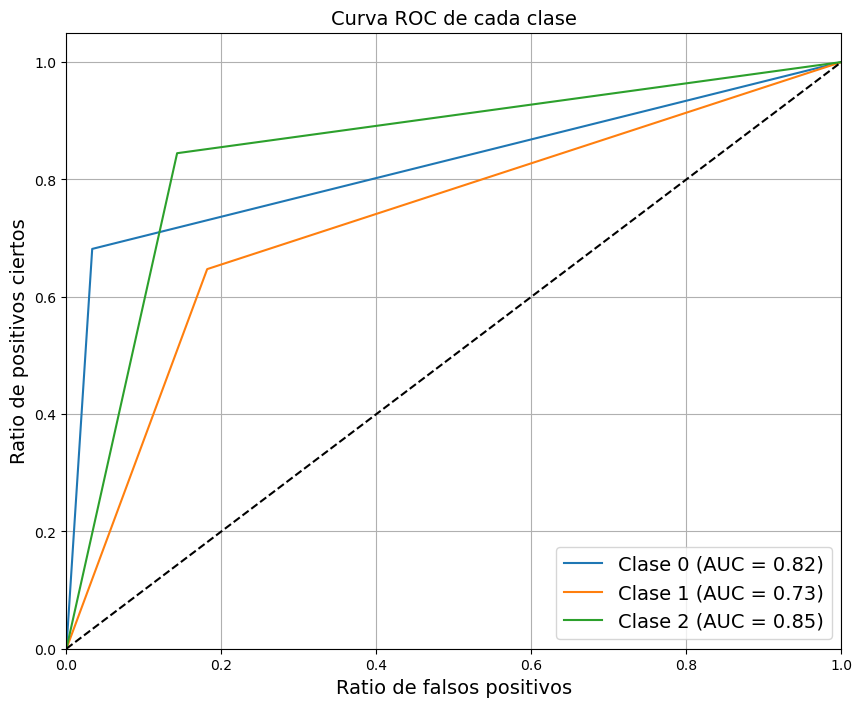

In [42]:
# Calcular precisión, recall y F1 score
precision = precision_score(Y_test, res_h2o, average=None)
recall = recall_score(Y_test, res_h2o, average=None)
f1 = f1_score(Y_test, res_h2o, average=None)

# Mostrar las métricas en un DataFrame
metrics_df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1 Score': f1}, index=np.unique(Y_test))
metrics_mean = metrics_df.mean().rename('Media')
#metrics_df = metrics_df.append(metrics_mean)
metrics_df = pd.concat([metrics_df, metrics_mean.to_frame().T])
print(metrics_df)

# Preparación para ROC y AUC
n_clases = len(np.unique(Y_test))
print(f"nclases {n_clases}")
Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
res_bin = label_binarize(res_h2o, classes=np.unique(Y_test))

# Calcular la curva ROC y su área en cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_clases):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], res_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Dibujar la curva ROC de cada clase
plt.figure(figsize=(10, 8))
for i in range(n_clases):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de falsos positivos')
plt.ylabel('Ratio de positivos ciertos')
plt.title('Curva ROC de cada clase')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [43]:
conf_matrix_h2o = confusion_matrix(Y_test, res_h2o)
print(conf_matrix_h2o)
value=sum(np.diag(conf_matrix_h2o))/sum(sum(conf_matrix_h2o))*100
print(f"Porcentaje de acierto: {value:.2f}%")

[[291  98  38]
 [ 27 154  57]
 [  3 100 560]]
Porcentaje de acierto: 75.68%


## Conclusión
---
A continuación realizaremos un resumen de lo que hemos hecho y un análisis de nuestros resultados:

El objetivo de nuestro código es realizar un algoritmo de machine learning que prediga si un alumno ha abandonado, se ha matriculado o se ha graduado de sus estudios a partir de una serie de datos.

Lo primero que realizamos fue hacer un tratamiento de los datos en el que vimos que tipos de datos teníamos, pasamos a datos numéricos todos los datos que eran strings para posteriormente normalizar todos los datos. A continuación dividimos nuestros datos en los que serán para entrenar a los modelos y los que serán para evaluarlos, en este proceso hemos forzado que haya el mismo porcentaje de datos de cada resultado en un grupo y en otro debido a que si lo realizábamos aleatoriamente, al ser un porcentaje muy bajo de los datos con target=matriculado, era muy probable que la casi todos esos datos quedasen únicamente en la parte de entrenamiento, de esta manera evitamos que nuestra máquina quede sesgada.

Una vez finalizado el tratamiento de datos comenzamos a crear nuestros modelos. El primero de ellos era una red neuronal basada en capas densas (cada neurona de una capa interactúa con todas las neuronas de la siguiente capa), en este modelo buscamos una arquitectura de la red que no nos provocase un overfitting, lo cual controlamos observando la evolución del loss y del val_loss.

Nuestro segundo y tercer modelo son más sencillos, ya que son una regresión logística y un árbol de decisión, los cuales una vez has realizado el tratamiento de datos es simplemente aplicar una función ya definida en sklearn.

El cuarto modelo es algo más complejo, ya que trabajamos con los paquetes de H2O, los cuales tienen como objetivo montar varios modelos los cuales va evaluandopara al final quedarse con el mejor de todos ellos. Con esto buscábamos ver si este paquete era capaz de mejorar la precisión de todos nuestros anteriores modelos, como ya hemos visto, no fue capaz, pero logró un muy buen valor de precisión.

A continuación representaremos de forma gráfica las matrices de confusión de cada uno de los modelos para poder compararlas.

Text(0.5, 1.0, 'H2O')

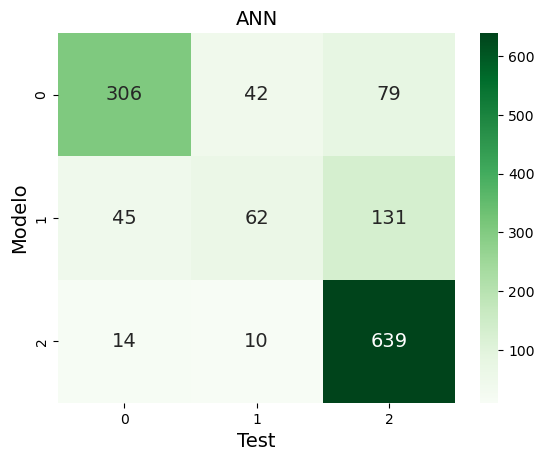

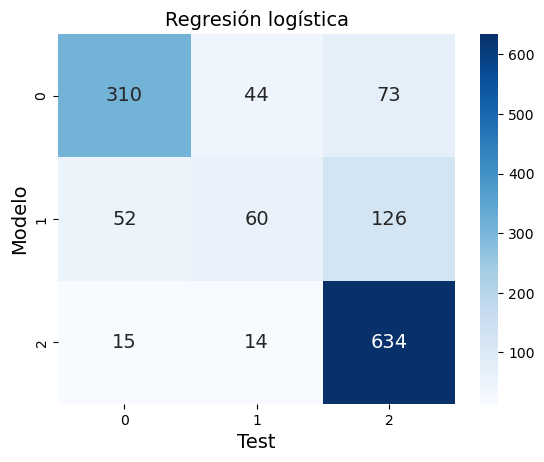

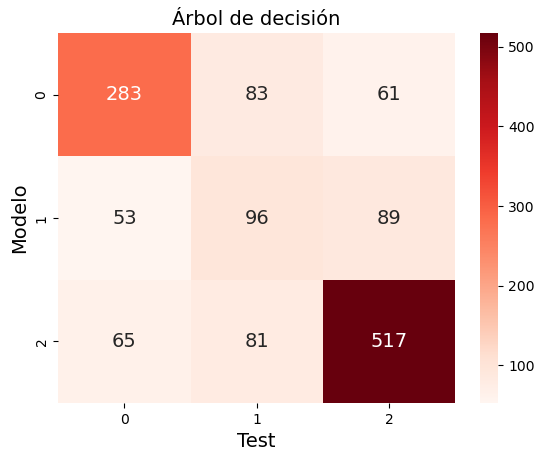

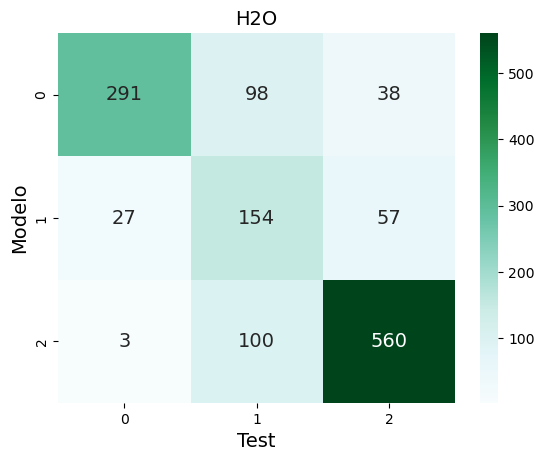

In [44]:
import seaborn as sns
#matriz de confusión de la ANN
plt.figure(1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.ylabel('Modelo')
plt.xlabel('Test')
plt.title('ANN')

#matriz de confusión de la regresión logística
plt.figure(2)
sns.heatmap(conf_matrix_regresion, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Modelo')
plt.xlabel('Test')
plt.title('Regresión logística')

#matriz de confusión del árbol de decisión
plt.figure(3)
sns.heatmap(conf_matrix_arbol, annot=True, fmt='d', cmap='Reds')
plt.ylabel('Modelo')
plt.xlabel('Test')
plt.title('Árbol de decisión')

#matriz de confusión de la regresión logística
plt.figure(4)
sns.heatmap(conf_matrix_h2o, annot=True, fmt='d', cmap='BuGn')
plt.ylabel('Modelo')
plt.xlabel('Test')
plt.title('H2O')

Como podemos observar, los modelos obtienen bastantes buenos resultados. El modelo que peor trabaja es el del árbol de decisión, que obtiene alrededor de un 10% menos de aciertos. Y el que mejor hemos conseguido que trabaje es el de la red neuronal, el cual podríamos decir que es en el que más partido hemos tomado nosotros para establecer su arquitectura, ya que más o menos el resto son bastante automáticos.

También podemos observar que en todos los modelos, lo que peor predicen son los resultados que dan 1 (matriculados), esto es debido a que, como ya dijimos previamente, en la base de datos hay un porcentaje muy bajo de estos resultados, por lo que los modelos no llegan a estar bien entrenados para estos resultados.